In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import rasterio as rio
import rioxarray as rxr
from rasterio.windows import Window
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import xarray as xr

In [2]:
filepath = '/home/jovyan/UrbanForest'
infile = os.path.join(filepath, 'santa_monica_ortho_1-1_hn_s_ca037_2016_1_originwarp.tif')
outfile = os.path.join(filepath, 'santa_monica_ortho_1-1_hn_s_ca037_2016_1_originwarp_ndvi.tif')

In [3]:
data = rxr.open_rasterio(infile)
data.shape

(3, 6166, 6833)

In [6]:
def green_leaf_idx(r, g, b):
    return(((g - r) + (g - b)) / (2 * g + r + b))

In [7]:
gli = green_leaf_idx(data[0], data[1], data[2])

In [9]:
gli.shape

(6166, 6833)

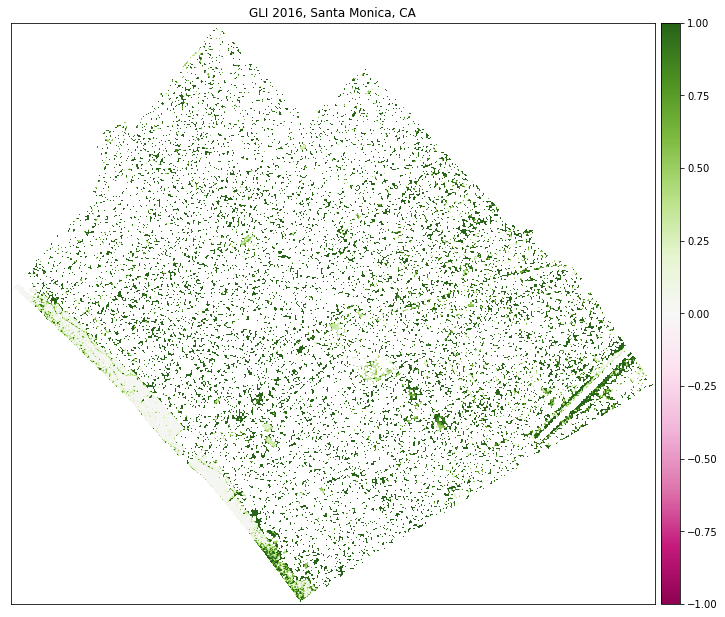

<AxesSubplot:title={'center':'GLI 2016, Santa Monica, CA'}>

In [12]:
ep.plot_bands(gli,
              cmap='PiYG',
              scale=False,
              vmin=-1, vmax=1,
              title='GLI 2016, Santa Monica, CA')

In [25]:
2/np.NaN

nan

In [31]:
x = data[2]
print(f'{np.nanmax(x)}  ---   {np.nanmin(x)}')

255  ---   0


ValueError: supplied range of [0.0, inf] is not finite

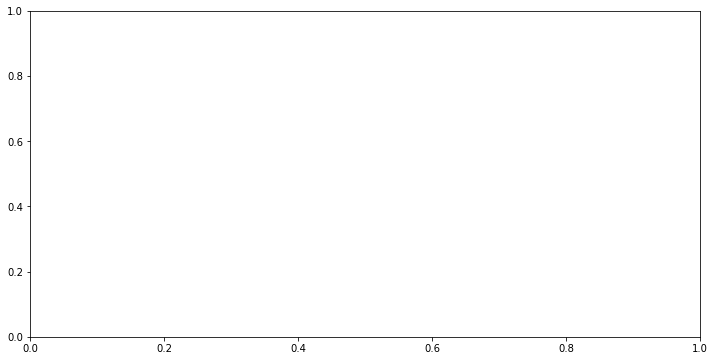

In [16]:
ep.hist(gli.values,
        figsize=(12, 6),
        title=['GLI: Distribution of pixels\n NAIP 2016 Santa Monica, CA'])